In [ ]:
import pandas as pd
import numpy as np
import shutil
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import random
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, BatchNormalization
from keras.optimizers import SGD

# Load Data

In [ ]:
# 불필요한 폴더 삭제
if os.path.exists("/content/drive/MyDrive/KDEF_Angle/Train/.ipynb_checkpoints"):
    shutil.rmtree("/content/drive/MyDrive/KDEF_Angle/Train/.ipynb_checkpoints")

if os.path.exists("/content/drive/MyDrive/KDEF_Angle/Test/.ipynb_checkpoints"):
    shutil.rmtree("/content/drive/MyDrive/KDEF_Angle/Test/.ipynb_checkpoints")

In [ ]:
TEST_DIR = '/content/drive/MyDrive/KDEF_Angle/Test/'

In [ ]:
def load_dataset(directory):
    image_paths = []
    labels = []
    
    for label in os.listdir(directory):
        if label == '.DS_Store':
            continue
        for filename in os.listdir(directory+label):
            image_path = os.path.join(directory, label, filename)
            image_paths.append(image_path)
            labels.append(label)
            
        print(label, "Completed")
        
    return image_paths, labels

In [ ]:
test = pd.DataFrame()
test['image'], test['label'] = load_dataset(TEST_DIR)
test.head()

afraid Completed
surprised Completed
disgusted Completed
angry Completed
neutral Completed
sad Completed
happy Completed


image   label
0  /content/drive/MyDrive/KDEF_Angle/Test/afraid/...  afraid
1  /content/drive/MyDrive/KDEF_Angle/Test/afraid/...  afraid
2  /content/drive/MyDrive/KDEF_Angle/Test/afraid/...  afraid
3  /content/drive/MyDrive/KDEF_Angle/Test/afraid/...  afraid
4  /content/drive/MyDrive/KDEF_Angle/Test/afraid/...  afraid

# Define Feature Extraction Method

In [ ]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, grayscale=True)
        cropped_img = img.crop((left, upper, right, bottom)).resize((224,300), Image.ANTIALIAS)
        img = np.array(cropped_img)
        features.append(img)

    features = np.array(features)
    features = features.reshape(len(features), 300, 224, 1)
    print(features.shape)
    return features

# 👈👈 Full Left Model 


> Full Left 사진만 학습할 모델

---





In [ ]:
TRAIN_DIR = '/content/drive/MyDrive/KDEF_Angle/Train/fullLeft/'

In [ ]:
## convert into dataframe
train = pd.DataFrame()
train['image'], train['label'] = load_dataset(TRAIN_DIR)
# shuffle the dataset
train = train.sample(frac=1).reset_index(drop=True)
train.head()

angry Completed
neutral Completed
sad Completed
happy Completed
afraid Completed
surprised Completed
disgusted Completed


image      label
0  /content/drive/MyDrive/KDEF_Angle/Train/fullLe...        sad
1  /content/drive/MyDrive/KDEF_Angle/Train/fullLe...     afraid
2  /content/drive/MyDrive/KDEF_Angle/Train/fullLe...      happy
3  /content/drive/MyDrive/KDEF_Angle/Train/fullLe...     afraid
4  /content/drive/MyDrive/KDEF_Angle/Train/fullLe...  disgusted

## Exploratory Data Analysis

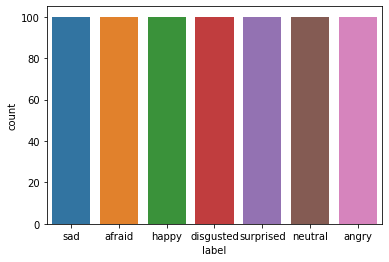

In [ ]:
sns.countplot(train['label'])

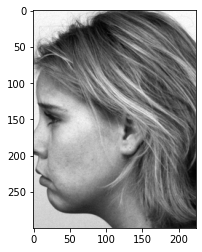

In [ ]:
from PIL import Image

# center crop 적용 후, 224 x 300의 크기를 사용
img = Image.open(train['image'][0]).convert("L")
frac = 0.75
left = img.size[0]*((1-frac)/2)
upper = img.size[1]*((1-frac)/2)
right = img.size[0]-((1-frac)/2)*img.size[0]
bottom = img.size[1]-((1-frac)/2)*img.size[1]

cropped_img = img.crop((left, upper, right, bottom)).resize((224,300), Image.ANTIALIAS)
plt.imshow(cropped_img, cmap='gray');

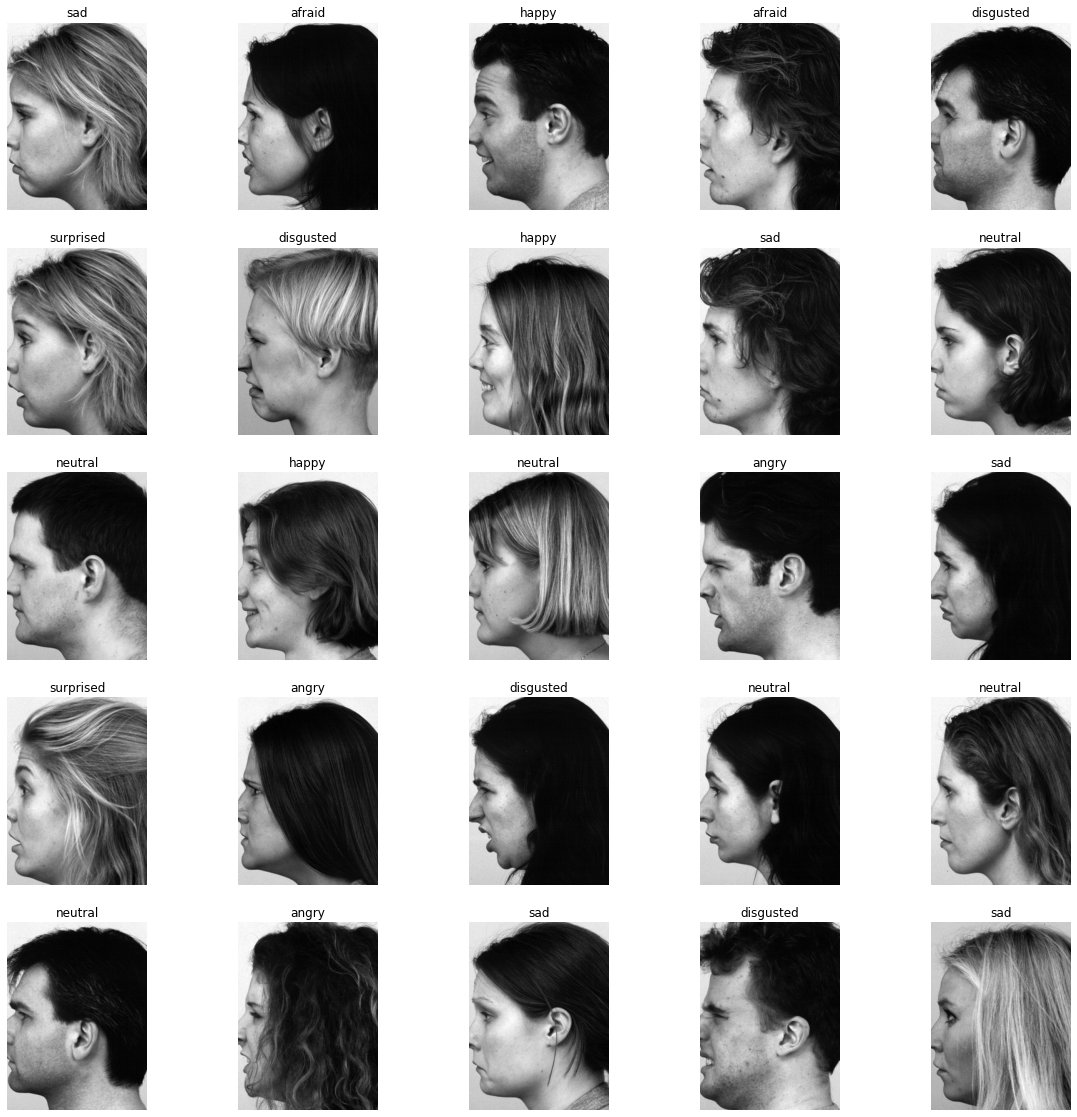

In [ ]:
# to display grid of images
plt.figure(figsize=(20,20))
files = train.iloc[0:25]

for index, file, label in files.itertuples():
    plt.subplot(5, 5, index+1)
    img = load_img(file, grayscale=True)
    cropped_img = img.crop((left, upper, right, bottom)).resize((224,300), Image.ANTIALIAS)
    img = np.array(cropped_img)
    plt.imshow(cropped_img, cmap='gray')
    plt.title(label)
    plt.axis('off')

## Feature Extraction

In [ ]:
test_features = extract_features(test['image'])

  0%|          | 0/1400 [00:00<?, ?it/s]

(1400, 300, 224, 1)


In [ ]:
train_features = extract_features(train['image'])

  0%|          | 0/700 [00:00<?, ?it/s]

(700, 300, 224, 1)


In [ ]:
## normalize the image
x_train = train_features/255.0
x_test = test_features/255.0

In [ ]:
## convert label to integer
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train['label'])
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [ ]:
# one-hot encoding
y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

In [ ]:
print(y_train[0])
print(y_test[0])

[0. 0. 0. 0. 0. 1. 0.]
[1. 0. 0. 0. 0. 0. 0.]


## Model Creation

In [ ]:
# config
input_shape = (300, 224, 1)
output_class = 7

In [ ]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

# output layer
model.add(Dense(output_class, activation='softmax'))

opt = tf.keras.optimizers.Adam(learning_rate=0.00001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics='accuracy')

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 222, 128)     1280      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 111, 128)    0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 149, 111, 128)     0         
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 109, 256)     295168    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 54, 256)      0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 73, 54, 256)       0

In [ ]:
# train the model
history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
22/22 [==============================] - 34s 926ms/step - loss: 1.9515 - accuracy: 0.1543 - val_loss: 1.9458 - val_accuracy: 0.1450
Epoch 2/100
22/22 [==============================] - 14s 639ms/step - loss: 1.9508 - accuracy: 0.1529 - val_loss: 1.9457 - val_accuracy: 0.1407
Epoch 3/100
22/22 [==============================] - 14s 643ms/step - loss: 1.9460 - accuracy: 0.1386 - val_loss: 1.9454 - val_accuracy: 0.1529
Epoch 4/100
22/22 [==============================] - 14s 650ms/step - loss: 1.9443 - accuracy: 0.1586 - val_loss: 1.9452 - val_accuracy: 0.1821
Epoch 5/100
22/22 [==============================] - 14s 655ms/step - loss: 1.9438 - accuracy: 0.1571 - val_loss: 1.9450 - val_accuracy: 0.1600
Epoch 6/100
22/22 [==============================] - 14s 664ms/step - loss: 1.9418 - accuracy: 0.1614 - val_loss: 1.9448 - val_accuracy: 0.1729
Epoch 7/100
22/22 [==============================] - 14s 666ms/step - loss: 1.9340 - accuracy: 0.1671 - val_loss: 1.9447 - val_accuracy:

## Plot the Results

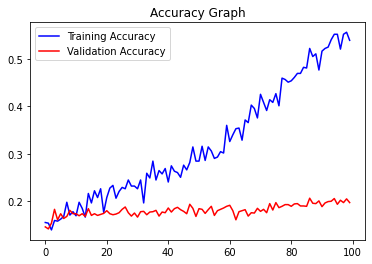

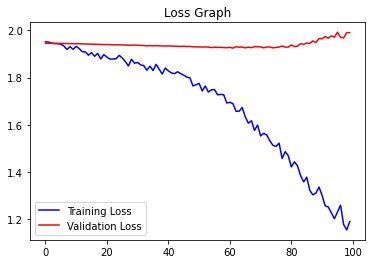

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()

plt.show()

## Save Model

In [ ]:
model.save('fer_fullLeft.h5')

# 👈 Half Left Model 


> Half Left 사진만 학습할 모델

---





In [ ]:
TRAIN_DIR = '/content/drive/MyDrive/KDEF_Angle/Train/halfLeft/'

In [ ]:
## convert into dataframe
train = pd.DataFrame()
train['image'], train['label'] = load_dataset(TRAIN_DIR)
# shuffle the dataset
train = train.sample(frac=1).reset_index(drop=True)
train.head()

sad Completed
happy Completed
afraid Completed
surprised Completed
disgusted Completed
angry Completed
neutral Completed


image    label
0  /content/drive/MyDrive/KDEF_Angle/Train/halfLe...  neutral
1  /content/drive/MyDrive/KDEF_Angle/Train/halfLe...      sad
2  /content/drive/MyDrive/KDEF_Angle/Train/halfLe...   afraid
3  /content/drive/MyDrive/KDEF_Angle/Train/halfLe...    angry
4  /content/drive/MyDrive/KDEF_Angle/Train/halfLe...    happy

## Exploratory Data Analysis

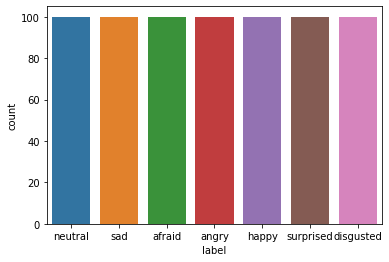

In [ ]:
sns.countplot(train['label'])

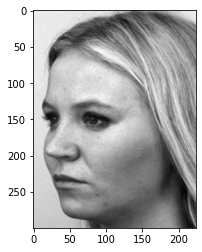

In [ ]:
from PIL import Image

# center crop 적용 후, 224 x 300의 크기를 사용
img = Image.open(train['image'][0]).convert("L")
frac = 0.75
left = img.size[0]*((1-frac)/2)
upper = img.size[1]*((1-frac)/2)
right = img.size[0]-((1-frac)/2)*img.size[0]
bottom = img.size[1]-((1-frac)/2)*img.size[1]

cropped_img = img.crop((left, upper, right, bottom)).resize((224,300), Image.ANTIALIAS)
plt.imshow(cropped_img, cmap='gray');

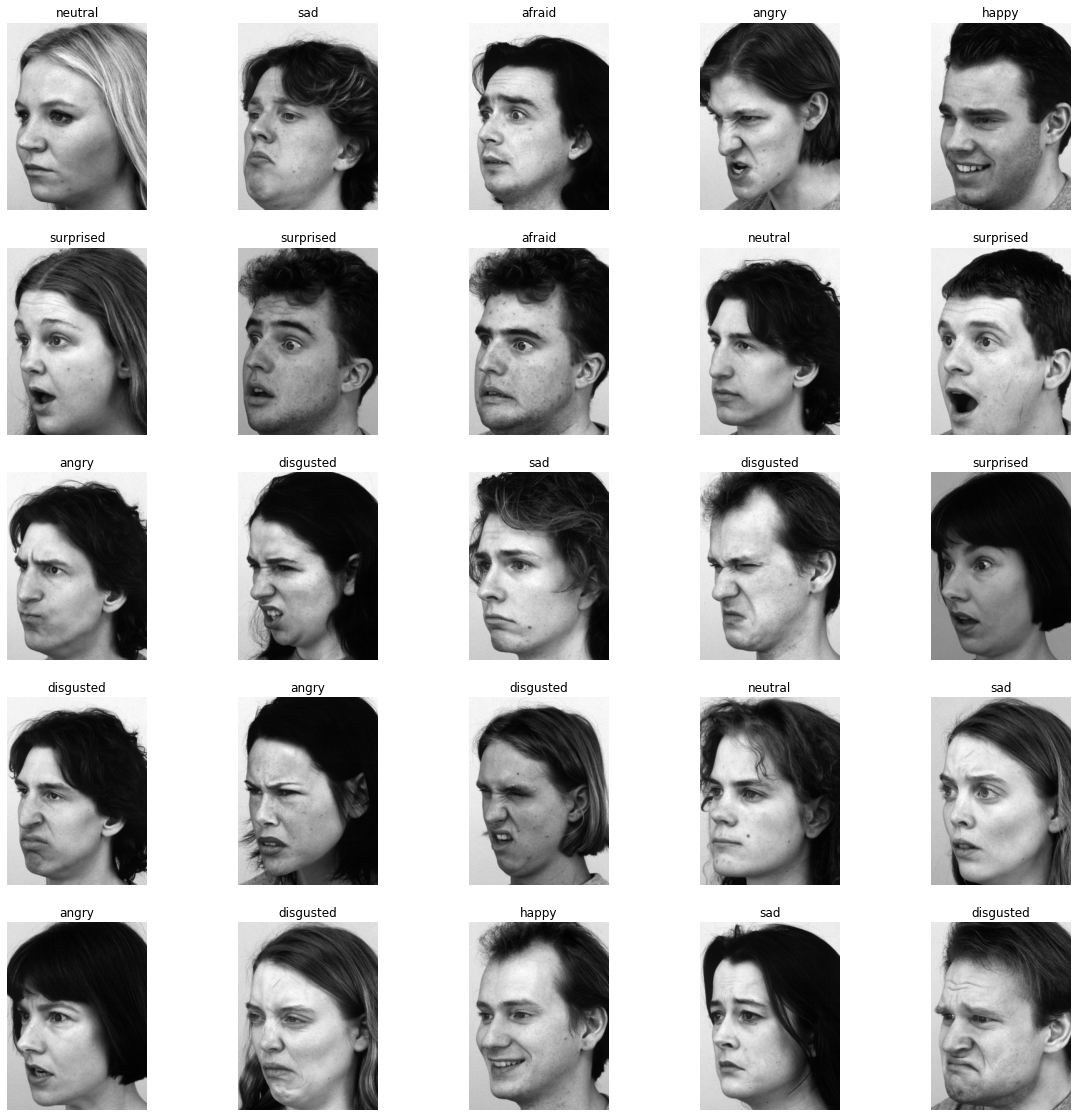

In [ ]:
# to display grid of images
plt.figure(figsize=(20,20))
files = train.iloc[0:25]

for index, file, label in files.itertuples():
    plt.subplot(5, 5, index+1)
    img = load_img(file, grayscale=True)
    cropped_img = img.crop((left, upper, right, bottom)).resize((224,300), Image.ANTIALIAS)
    img = np.array(cropped_img)
    plt.imshow(cropped_img, cmap='gray')
    plt.title(label)
    plt.axis('off')

## Feature Extraction

In [ ]:
train_features = extract_features(train['image'])

  0%|          | 0/700 [00:00<?, ?it/s]

(700, 300, 224, 1)


In [ ]:
test_features = extract_features(test['image'])

  0%|          | 0/1400 [00:00<?, ?it/s]

(1400, 300, 224, 1)


In [ ]:
## normalize the image
x_train = train_features/255.0
x_test = test_features/255.0

In [ ]:
## convert label to integer
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train['label'])
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [ ]:
# one-hot encoding
y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

In [ ]:
print(y_train[0])
print(y_test[0])

[0. 0. 0. 0. 1. 0. 0.]
[1. 0. 0. 0. 0. 0. 0.]


## Model Creation

In [ ]:
# config
input_shape = (300, 224, 1)
output_class = 7

In [ ]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

# output layer
model.add(Dense(output_class, activation='softmax'))

opt = tf.keras.optimizers.Adam(learning_rate=0.00001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics='accuracy')

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 298, 222, 128)     1280      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 149, 111, 128)    0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 149, 111, 128)     0         
                                                                 
 conv2d_5 (Conv2D)           (None, 147, 109, 256)     295168    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 73, 54, 256)      0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 73, 54, 256)      

In [ ]:
# train the model
history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
22/22 [==============================] - 15s 663ms/step - loss: 1.9568 - accuracy: 0.1386 - val_loss: 1.9457 - val_accuracy: 0.1500
Epoch 2/100
22/22 [==============================] - 14s 650ms/step - loss: 1.9658 - accuracy: 0.1371 - val_loss: 1.9454 - val_accuracy: 0.1436
Epoch 3/100
22/22 [==============================] - 14s 660ms/step - loss: 1.9478 - accuracy: 0.1600 - val_loss: 1.9451 - val_accuracy: 0.1521
Epoch 4/100
22/22 [==============================] - 14s 668ms/step - loss: 1.9416 - accuracy: 0.1614 - val_loss: 1.9447 - val_accuracy: 0.1679
Epoch 5/100
22/22 [==============================] - 14s 668ms/step - loss: 1.9466 - accuracy: 0.1457 - val_loss: 1.9445 - val_accuracy: 0.1921
Epoch 6/100
22/22 [==============================] - 14s 662ms/step - loss: 1.9384 - accuracy: 0.1600 - val_loss: 1.9444 - val_accuracy: 0.1886
Epoch 7/100
22/22 [==============================] - 14s 658ms/step - loss: 1.9286 - accuracy: 0.1686 - val_loss: 1.9441 - val_accuracy:

## Plot the Results

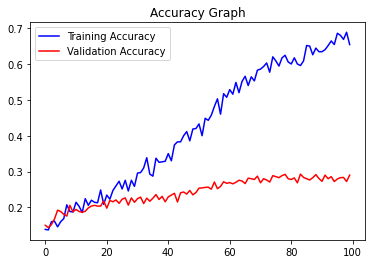

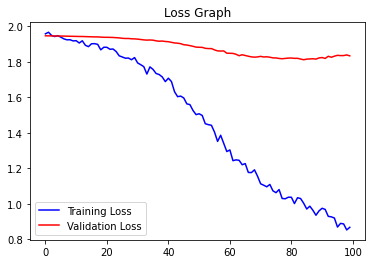

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()

plt.show()

## Save Model

In [ ]:
model.save('fer_halfLeft.h5')

# 🧑 Straight Model 


> Straight 사진만 학습할 모델

---





In [ ]:
TRAIN_DIR = '/content/drive/MyDrive/KDEF_Angle/Train/straight/'

In [ ]:
## convert into dataframe
train = pd.DataFrame()
train['image'], train['label'] = load_dataset(TRAIN_DIR)
# shuffle the dataset
train = train.sample(frac=1).reset_index(drop=True)
train.head()

afraid Completed
disgusted Completed
angry Completed
neutral Completed
sad Completed
surprised Completed
happy Completed


image      label
0  /content/drive/MyDrive/KDEF_Angle/Train/straig...        sad
1  /content/drive/MyDrive/KDEF_Angle/Train/straig...    neutral
2  /content/drive/MyDrive/KDEF_Angle/Train/straig...    neutral
3  /content/drive/MyDrive/KDEF_Angle/Train/straig...        sad
4  /content/drive/MyDrive/KDEF_Angle/Train/straig...  disgusted

## Exploratory Data Analysis

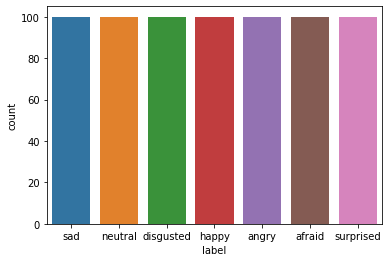

In [ ]:
sns.countplot(train['label'])

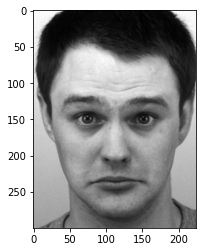

In [ ]:
from PIL import Image

# center crop 적용 후, 224 x 300의 크기를 사용
img = Image.open(train['image'][0]).convert("L")
frac = 0.75
left = img.size[0]*((1-frac)/2)
upper = img.size[1]*((1-frac)/2)
right = img.size[0]-((1-frac)/2)*img.size[0]
bottom = img.size[1]-((1-frac)/2)*img.size[1]

cropped_img = img.crop((left, upper, right, bottom)).resize((224,300), Image.ANTIALIAS)
plt.imshow(cropped_img, cmap='gray');

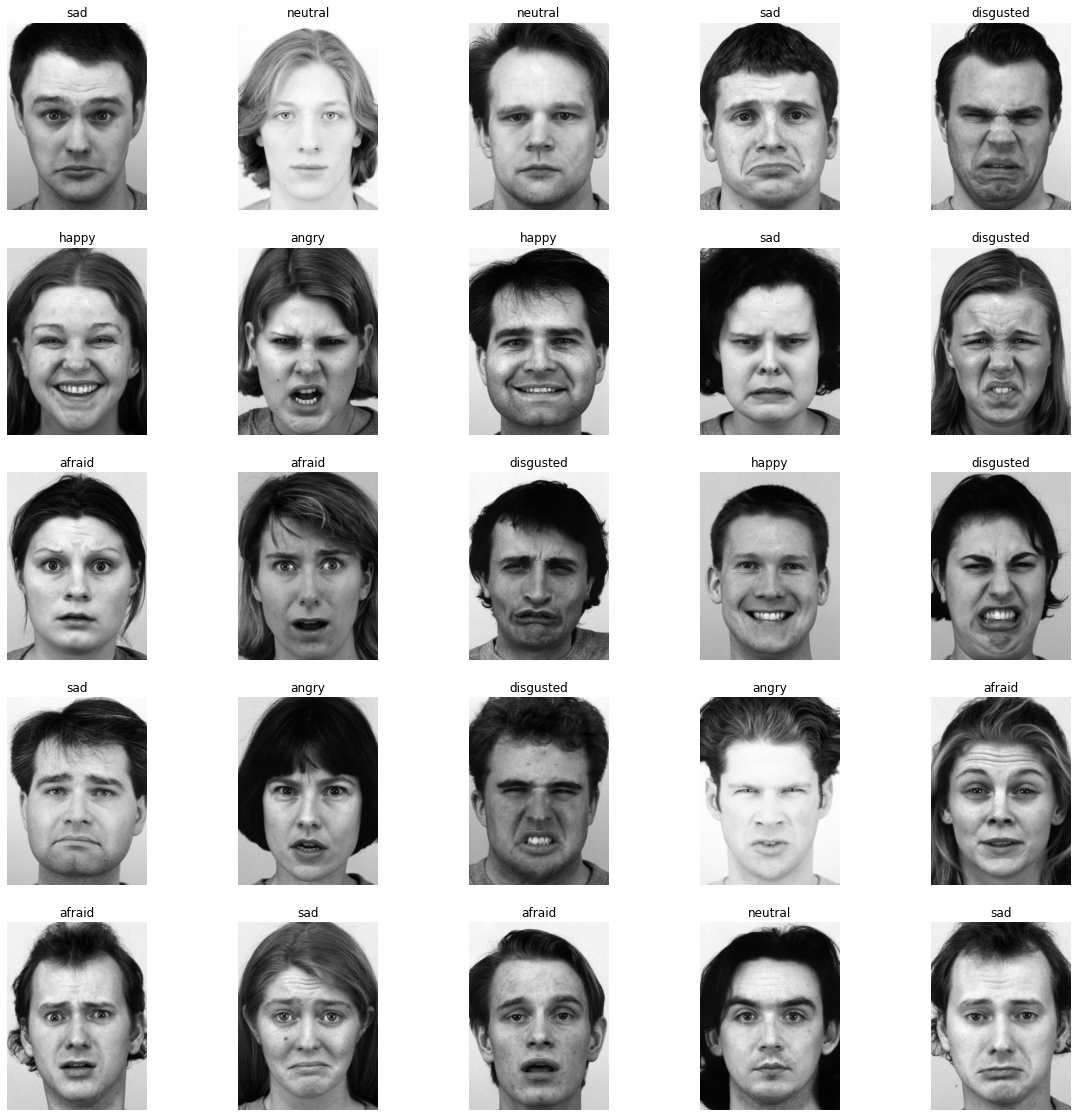

In [ ]:
# to display grid of images
plt.figure(figsize=(20,20))
files = train.iloc[0:25]

for index, file, label in files.itertuples():
    plt.subplot(5, 5, index+1)
    img = load_img(file, grayscale=True)
    cropped_img = img.crop((left, upper, right, bottom)).resize((224,300), Image.ANTIALIAS)
    img = np.array(cropped_img)
    plt.imshow(cropped_img, cmap='gray')
    plt.title(label)
    plt.axis('off')

## Feature Extraction

In [ ]:
train_features = extract_features(train['image'])

  0%|          | 0/700 [00:00<?, ?it/s]

(700, 300, 224, 1)


In [ ]:
test_features = extract_features(test['image'])

  0%|          | 0/1400 [00:00<?, ?it/s]

(1400, 300, 224, 1)


In [ ]:
## normalize the image
x_train = train_features/255.0
x_test = test_features/255.0

In [ ]:
## convert label to integer
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train['label'])
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [ ]:
# one-hot encoding
y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

In [ ]:
print(y_train[0])
print(y_test[0])

[0. 0. 0. 0. 0. 1. 0.]
[1. 0. 0. 0. 0. 0. 0.]


## Model Creation

In [ ]:
# config
input_shape = (300, 224, 1)
output_class = 7

In [ ]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

# output layer
model.add(Dense(output_class, activation='softmax'))

opt = tf.keras.optimizers.Adam(learning_rate=0.00001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics='accuracy')

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 298, 222, 128)     1280      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 149, 111, 128)    0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 149, 111, 128)     0         
                                                                 
 conv2d_9 (Conv2D)           (None, 147, 109, 256)     295168    
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 73, 54, 256)      0         
 2D)                                                             
                                                                 
 dropout_13 (Dropout)        (None, 73, 54, 256)      

In [ ]:
# train the model
history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
22/22 [==============================] - 15s 662ms/step - loss: 1.9558 - accuracy: 0.1443 - val_loss: 1.9453 - val_accuracy: 0.1443
Epoch 2/100
22/22 [==============================] - 14s 651ms/step - loss: 1.9497 - accuracy: 0.1386 - val_loss: 1.9452 - val_accuracy: 0.1836
Epoch 3/100
22/22 [==============================] - 14s 659ms/step - loss: 1.9519 - accuracy: 0.1343 - val_loss: 1.9452 - val_accuracy: 0.1771
Epoch 4/100
22/22 [==============================] - 14s 667ms/step - loss: 1.9439 - accuracy: 0.1471 - val_loss: 1.9450 - val_accuracy: 0.1500
Epoch 5/100
22/22 [==============================] - 14s 664ms/step - loss: 1.9434 - accuracy: 0.1629 - val_loss: 1.9449 - val_accuracy: 0.1686
Epoch 6/100
22/22 [==============================] - 14s 658ms/step - loss: 1.9346 - accuracy: 0.1629 - val_loss: 1.9446 - val_accuracy: 0.1857
Epoch 7/100
22/22 [==============================] - 19s 873ms/step - loss: 1.9333 - accuracy: 0.1700 - val_loss: 1.9442 - val_accuracy:

## Plot the Results

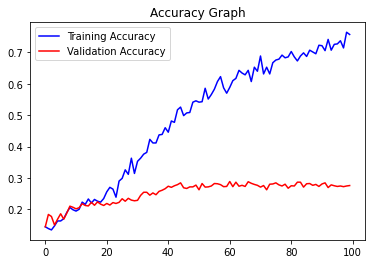

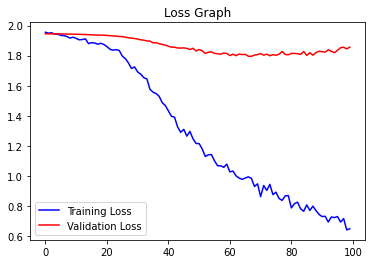

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()

plt.show()

## Save Model

In [ ]:
model.save('fer_straight.h5')

# 👉 Half Right Model 


> Half Right 사진만 학습할 모델

---





In [ ]:
TRAIN_DIR = '/content/drive/MyDrive/KDEF_Angle/Train/halfRight/'

In [ ]:
## convert into dataframe
train = pd.DataFrame()
train['image'], train['label'] = load_dataset(TRAIN_DIR)
# shuffle the dataset
train = train.sample(frac=1).reset_index(drop=True)
train.head()

afraid Completed
surprised Completed
disgusted Completed
angry Completed
neutral Completed
sad Completed
happy Completed


image      label
0  /content/drive/MyDrive/KDEF_Angle/Train/halfRi...  surprised
1  /content/drive/MyDrive/KDEF_Angle/Train/halfRi...  disgusted
2  /content/drive/MyDrive/KDEF_Angle/Train/halfRi...  surprised
3  /content/drive/MyDrive/KDEF_Angle/Train/halfRi...  surprised
4  /content/drive/MyDrive/KDEF_Angle/Train/halfRi...      angry

## Exploratory Data Analysis

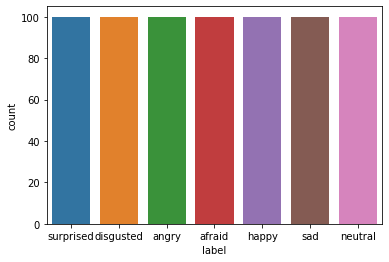

In [ ]:
sns.countplot(train['label'])

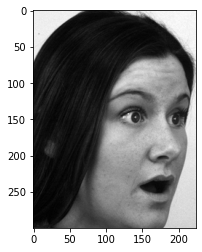

In [ ]:
from PIL import Image

# center crop 적용 후, 224 x 300의 크기를 사용
img = Image.open(train['image'][0]).convert("L")
frac = 0.75
left = img.size[0]*((1-frac)/2)
upper = img.size[1]*((1-frac)/2)
right = img.size[0]-((1-frac)/2)*img.size[0]
bottom = img.size[1]-((1-frac)/2)*img.size[1]

cropped_img = img.crop((left, upper, right, bottom)).resize((224,300), Image.ANTIALIAS)
plt.imshow(cropped_img, cmap='gray');

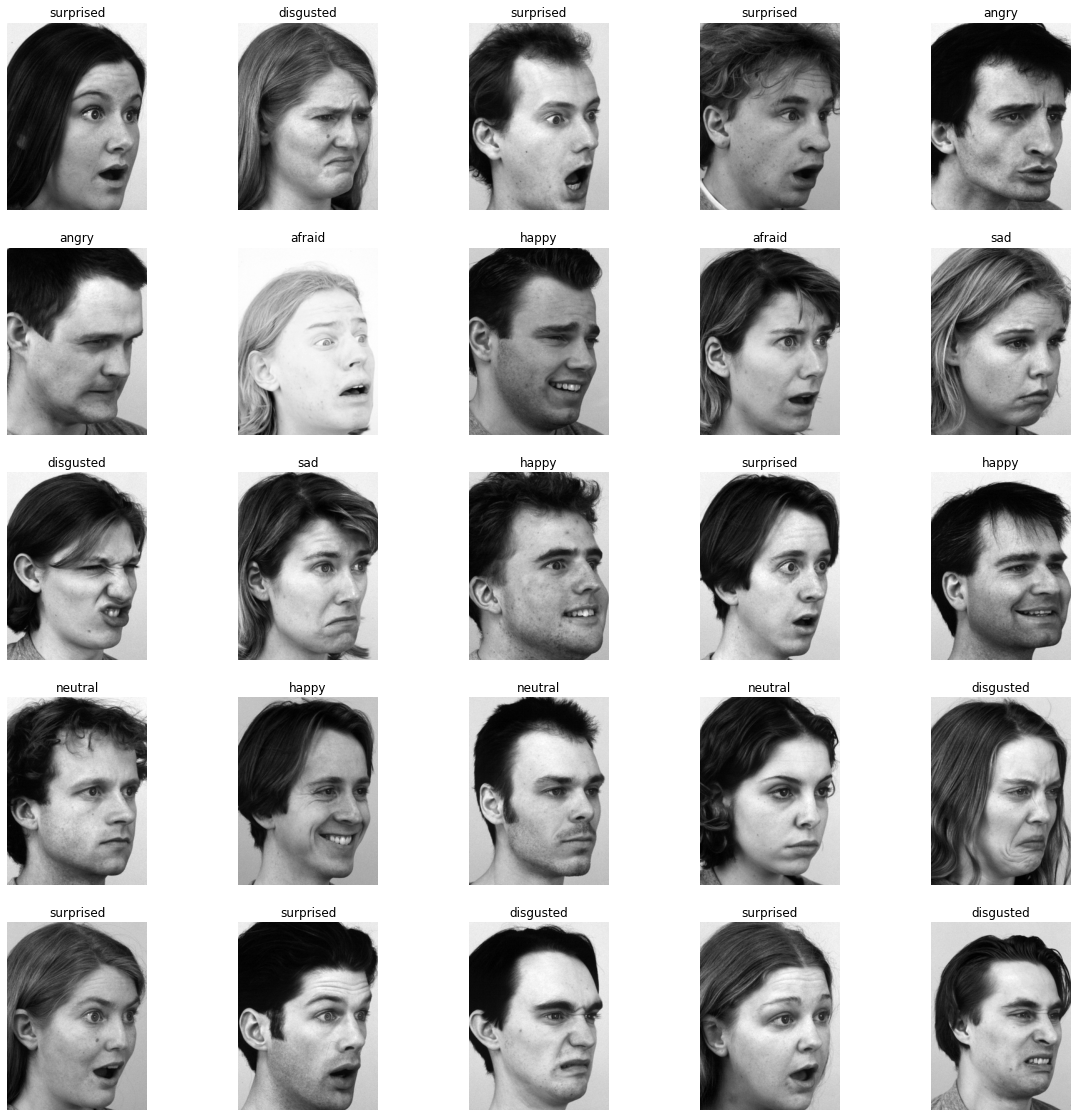

In [ ]:
# to display grid of images
plt.figure(figsize=(20,20))
files = train.iloc[0:25]

for index, file, label in files.itertuples():
    plt.subplot(5, 5, index+1)
    img = load_img(file, grayscale=True)
    cropped_img = img.crop((left, upper, right, bottom)).resize((224,300), Image.ANTIALIAS)
    img = np.array(cropped_img)
    plt.imshow(cropped_img, cmap='gray')
    plt.title(label)
    plt.axis('off')

## Feature Extraction

In [ ]:
train_features = extract_features(train['image'])

  0%|          | 0/700 [00:00<?, ?it/s]

(700, 300, 224, 1)


In [ ]:
test_features = extract_features(test['image'])

  0%|          | 0/1400 [00:00<?, ?it/s]

(1400, 300, 224, 1)


In [ ]:
## normalize the image
x_train = train_features/255.0
x_test = test_features/255.0

In [ ]:
## convert label to integer
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train['label'])
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [ ]:
# one-hot encoding
y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

In [ ]:
print(y_train[0])
print(y_test[0])

[0. 0. 0. 0. 0. 0. 1.]
[1. 0. 0. 0. 0. 0. 0.]


## Model Creation

In [ ]:
# config
input_shape = (300, 224, 1)
output_class = 7

In [ ]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

# output layer
model.add(Dense(output_class, activation='softmax'))

opt = tf.keras.optimizers.Adam(learning_rate=0.00001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics='accuracy')

print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 298, 222, 128)     1280      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 149, 111, 128)    0         
 g2D)                                                            
                                                                 
 dropout_18 (Dropout)        (None, 149, 111, 128)     0         
                                                                 
 conv2d_13 (Conv2D)          (None, 147, 109, 256)     295168    
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 73, 54, 256)      0         
 g2D)                                                            
                                                                 
 dropout_19 (Dropout)        (None, 73, 54, 256)      

In [ ]:
# train the model
history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
22/22 [==============================] - 15s 665ms/step - loss: 1.9692 - accuracy: 0.1229 - val_loss: 1.9453 - val_accuracy: 0.1579
Epoch 2/100
22/22 [==============================] - 14s 652ms/step - loss: 1.9516 - accuracy: 0.1529 - val_loss: 1.9450 - val_accuracy: 0.1857
Epoch 3/100
22/22 [==============================] - 14s 661ms/step - loss: 1.9461 - accuracy: 0.1571 - val_loss: 1.9448 - val_accuracy: 0.2014
Epoch 4/100
22/22 [==============================] - 14s 670ms/step - loss: 1.9448 - accuracy: 0.1629 - val_loss: 1.9445 - val_accuracy: 0.2000
Epoch 5/100
22/22 [==============================] - 14s 665ms/step - loss: 1.9322 - accuracy: 0.1900 - val_loss: 1.9442 - val_accuracy: 0.1921
Epoch 6/100
22/22 [==============================] - 14s 662ms/step - loss: 1.9412 - accuracy: 0.1700 - val_loss: 1.9438 - val_accuracy: 0.1929
Epoch 7/100
22/22 [==============================] - 14s 658ms/step - loss: 1.9220 - accuracy: 0.1814 - val_loss: 1.9434 - val_accuracy:

## Plot the Results

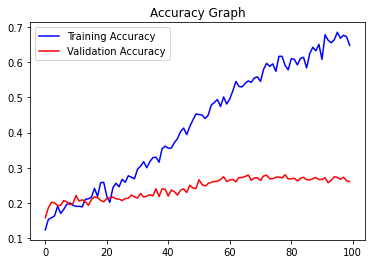

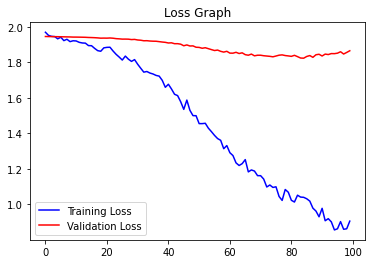

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()

plt.show()

## Save Model

In [ ]:
model.save('fer_halfRight.h5')

# 👉👉 Full Right Model 


> Full Right 사진만 학습할 모델

---





In [ ]:
TRAIN_DIR = '/content/drive/MyDrive/KDEF_Angle/Train/fullRight/'

In [ ]:
## convert into dataframe
train = pd.DataFrame()
train['image'], train['label'] = load_dataset(TRAIN_DIR)
# shuffle the dataset
train = train.sample(frac=1).reset_index(drop=True)
train.head()

afraid Completed
surprised Completed
disgusted Completed
angry Completed
neutral Completed
sad Completed
happy Completed


image   label
0  /content/drive/MyDrive/KDEF_Angle/Train/fullRi...     sad
1  /content/drive/MyDrive/KDEF_Angle/Train/fullRi...   angry
2  /content/drive/MyDrive/KDEF_Angle/Train/fullRi...  afraid
3  /content/drive/MyDrive/KDEF_Angle/Train/fullRi...   happy
4  /content/drive/MyDrive/KDEF_Angle/Train/fullRi...  afraid

## Exploratory Data Analysis

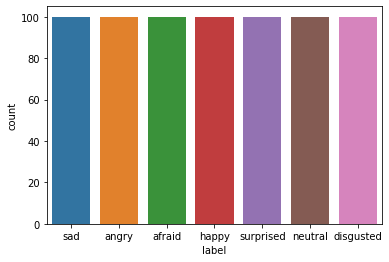

In [ ]:
sns.countplot(train['label'])

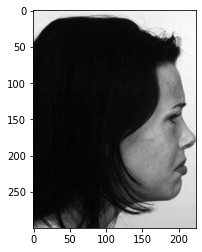

In [ ]:
from PIL import Image

# center crop 적용 후, 224 x 300의 크기를 사용
img = Image.open(train['image'][0]).convert("L")
frac = 0.8
left = img.size[0]*((1-frac)/2)
upper = img.size[1]*((1-frac)/2)
right = img.size[0]-((1-frac)/2)*img.size[0]
bottom = img.size[1]-((1-frac)/2)*img.size[1]

cropped_img = img.crop((left, upper, right, bottom)).resize((224,300), Image.ANTIALIAS)
plt.imshow(cropped_img, cmap='gray');

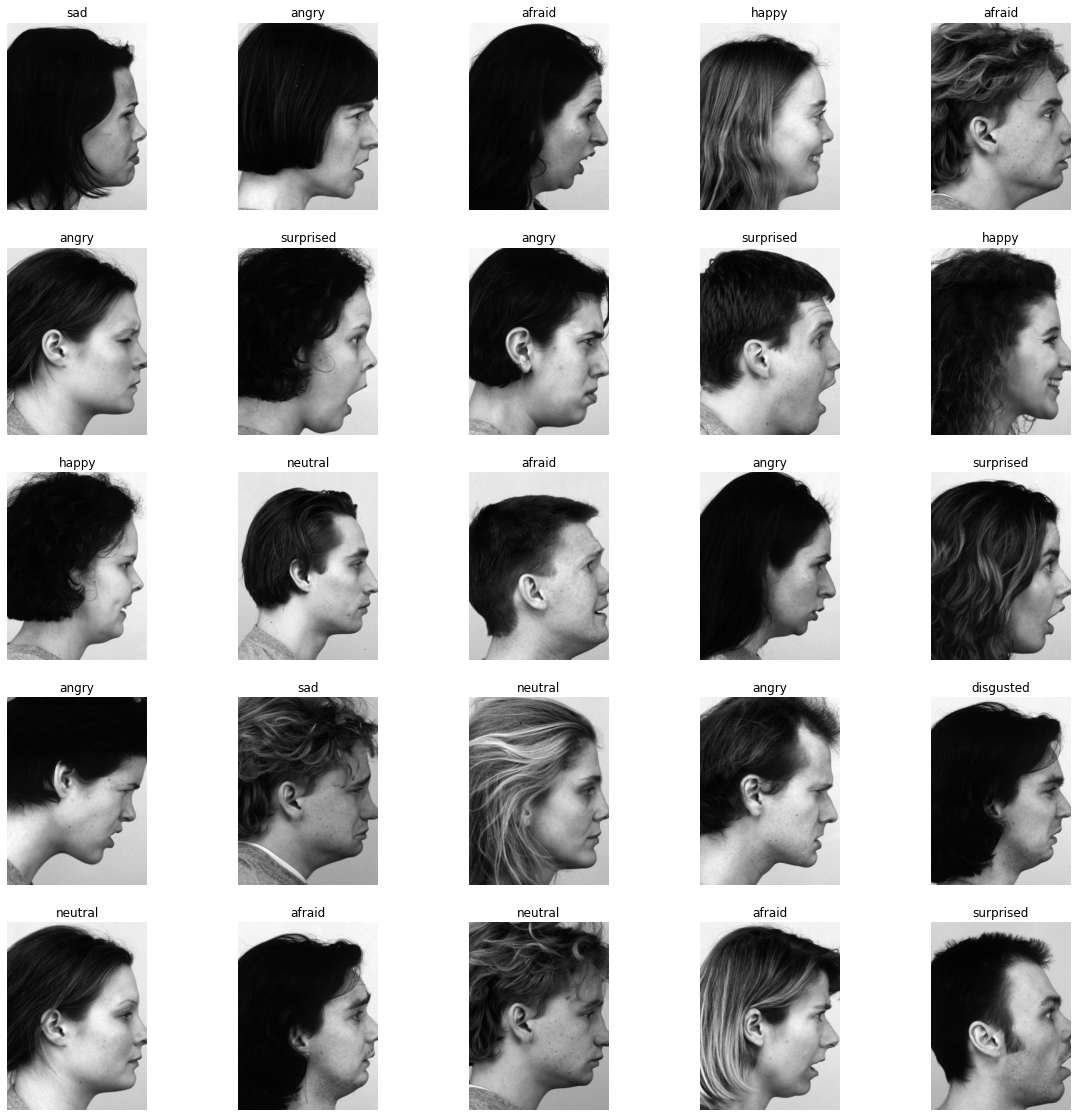

In [ ]:
# to display grid of images
plt.figure(figsize=(20,20))
files = train.iloc[0:25]

for index, file, label in files.itertuples():
    plt.subplot(5, 5, index+1)
    img = load_img(file, grayscale=True)
    cropped_img = img.crop((left, upper, right, bottom)).resize((224,300), Image.ANTIALIAS)
    img = np.array(cropped_img)
    plt.imshow(cropped_img, cmap='gray')
    plt.title(label)
    plt.axis('off')

## Feature Extraction

In [ ]:
train_features = extract_features(train['image'])

  0%|          | 0/700 [00:00<?, ?it/s]

(700, 300, 224, 1)


In [ ]:
test_features = extract_features(test['image'])

  0%|          | 0/1400 [00:00<?, ?it/s]

(1400, 300, 224, 1)


In [ ]:
## normalize the image
x_train = train_features/255.0
x_test = test_features/255.0

In [ ]:
## convert label to integer
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train['label'])
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [ ]:
# one-hot encoding
y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

In [ ]:
print(y_train[0])
print(y_test[0])

[0. 0. 0. 0. 0. 1. 0.]
[1. 0. 0. 0. 0. 0. 0.]


## Model Creation

In [ ]:
# config
input_shape = (300, 224, 1)
output_class = 7

In [ ]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

# output layer
model.add(Dense(output_class, activation='softmax'))

opt = tf.keras.optimizers.Adam(learning_rate=0.00001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics='accuracy')

print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 298, 222, 128)     1280      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 149, 111, 128)    0         
 g2D)                                                            
                                                                 
 dropout_24 (Dropout)        (None, 149, 111, 128)     0         
                                                                 
 conv2d_17 (Conv2D)          (None, 147, 109, 256)     295168    
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 73, 54, 256)      0         
 g2D)                                                            
                                                                 
 dropout_25 (Dropout)        (None, 73, 54, 256)      

In [ ]:
# train the model
history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
22/22 [==============================] - 15s 662ms/step - loss: 1.9558 - accuracy: 0.1400 - val_loss: 1.9456 - val_accuracy: 0.1371
Epoch 2/100
22/22 [==============================] - 14s 646ms/step - loss: 1.9513 - accuracy: 0.1571 - val_loss: 1.9454 - val_accuracy: 0.1521
Epoch 3/100
22/22 [==============================] - 14s 654ms/step - loss: 1.9376 - accuracy: 0.1786 - val_loss: 1.9451 - val_accuracy: 0.1507
Epoch 4/100
22/22 [==============================] - 14s 664ms/step - loss: 1.9467 - accuracy: 0.1314 - val_loss: 1.9450 - val_accuracy: 0.1700
Epoch 5/100
22/22 [==============================] - 14s 666ms/step - loss: 1.9475 - accuracy: 0.1543 - val_loss: 1.9448 - val_accuracy: 0.1793
Epoch 6/100
22/22 [==============================] - 14s 659ms/step - loss: 1.9320 - accuracy: 0.1829 - val_loss: 1.9445 - val_accuracy: 0.1643
Epoch 7/100
22/22 [==============================] - 14s 657ms/step - loss: 1.9409 - accuracy: 0.1543 - val_loss: 1.9442 - val_accuracy:

## Plot the Results

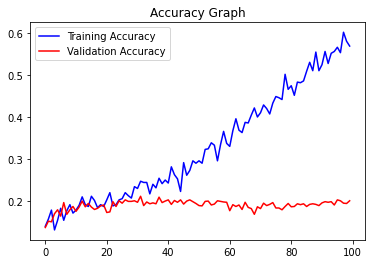

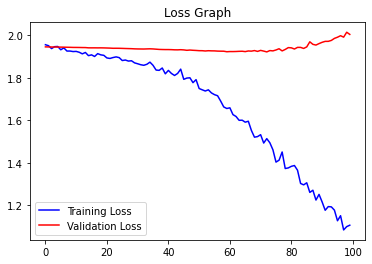

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()

plt.show()

## Save Model

In [ ]:
model.save('fer_fullRight.h5')

# 🏭 Ensemble Model


> 5개의 모델을 앙상블



## Feature Extraction

In [ ]:
test_features = extract_features(test['image'])

  0%|          | 0/1400 [00:00<?, ?it/s]

(1400, 300, 224, 1)


In [ ]:
## normalize the image
x_test = test_features/255.0

In [ ]:
## convert label to integer
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train['label'])
y_test = le.transform(test['label'])

In [ ]:
print(y_test)

[0 0 0 ... 3 3 3]


## Evaluate Ensemble

In [ ]:
from sklearn.metrics import accuracy_score
from tqdm import tqdm

In [ ]:
model_fullLeft = tf.keras.models.load_model('/content/fer_fullLeft.h5')
model_halfLeft = tf.keras.models.load_model('/content/fer_halfLeft.h5')
model_straight = tf.keras.models.load_model('/content/fer_straight.h5')
model_halfRight = tf.keras.models.load_model('/content/fer_halfRight.h5')
model_fullRight = tf.keras.models.load_model('/content/fer_fullRight.h5')

In [ ]:
models = [model_fullLeft, model_halfLeft, model_straight, model_halfRight, model_fullRight]

In [ ]:
def ensemble_predictions(models, test_x):
    # make predictions
    yhats = [model.predict(test_x, verbose = 0) for model in models]
    yhats = np.array(yhats)
    # sum across ensemble members
    summed = np.sum(yhats, axis=0)
    # argmax across classes
    result = np.argmax(summed, axis=1)
    return result

In [ ]:
def evaluate_ensemble_model(models, test_x, test_y):
    # make prediction
    yhat = [ensemble_predictions(models, testData.reshape(1, 300, 224, 1)) for testData in tqdm(test_x)]
    # calculate accuracy
    return accuracy_score(test_y, yhat)

In [ ]:
score = evaluate_ensemble_model(models, x_test, y_test)

100%|██████████| 1400/1400 [07:06<00:00,  3.29it/s]

Accuracy : 0.345


In [ ]:
print(f'Accuracy : {score}')

Accuracy : 0.345
